# Yerevan House Price Prediction

## Imports

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv("../../Data/yerevan_houses.csv")

data = data.drop(columns=['Unnamed: 0'])

In [44]:
data.head()

,price,condition,district,max_floor,street,num_rooms,region,area,url,num_bathrooms,building_type,floor,ceiling_height
0,65000.0,good,Center,9,Vardanants St,3,Yerevan,80.0,http://www.myrealty.am/en/item/24032/3-senyaka...,1,panel,4,2.8
1,140000.0,newly repaired,Arabkir,10,Hr.Kochar St,4,Yerevan,115.0,http://www.myrealty.am/en/item/17599/4-senyaka...,1,monolit,2,3.0
2,97000.0,newly repaired,Center,10,Teryan St,2,Yerevan,72.0,http://www.myrealty.am/en/item/29472/2-senyaka...,1,panel,3,2.8
3,47000.0,good,Center,9,D. Demirchyan St,1,Yerevan,43.0,http://www.myrealty.am/en/item/37186/1-senyaka...,1,panel,9,2.8
4,51000.0,newly repaired,Center,14,Sayat Nova Ave,1,Yerevan,33.0,http://www.myrealty.am/en/item/37184/1-senyaka...,1,other,4,2.8


### Split into train test

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
data['area'] = data['area'].apply(pd.to_numeric,errors='coerce')

In [47]:
data['price'] = data['price'].apply(pd.to_numeric,errors='coerce')
data.dropna(inplace=True)

In [48]:
X = data['area']
Y = data['price']
X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=58)

### Fit linear regression with area 

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
reg = LinearRegression().fit(X_train, y_train)

### Plot fited line and points, calculate loss and R^2

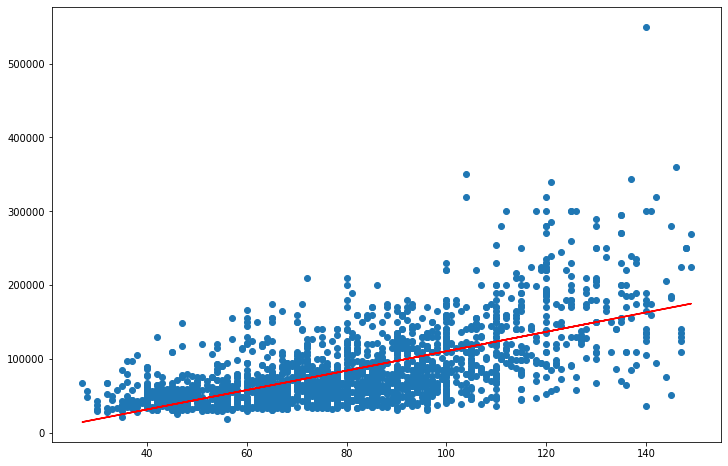

In [52]:
fig = plt.figure(figsize=(12,8))
plt.scatter(X_test,y_test)
plt.plot(X_test,reg.predict(X_test),'r')

In [53]:
reg.score(X_test,y_test)

0.3911921076372702

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
mean_squared_error(y_train, reg.predict(X_train))

1655852427.1790726

In [56]:
mean_squared_error(y_test,reg.predict(X_test))

1668495691.2129145

### Add new features, use pd.get_dumies for vectorization categorical variables

In [57]:
data = data.drop(['url','region','street'],axis=1)

In [58]:

data = data.drop(columns=['district'])
# data['Condtion_vectorized']=pd.get_dummies(data['condition'])
data_test = data
data = pd.get_dummies(data,columns=None,drop_first=True)

In [59]:
data.head()

,price,max_floor,num_rooms,area,num_bathrooms,floor,ceiling_height,condition_newly repaired,condition_zero condition,building_type_other,building_type_panel,building_type_stone
0,65000.0,9,3,80.0,1,4,2.8,0,0,0,1,0
1,140000.0,10,4,115.0,1,2,3.0,1,0,0,0,0
2,97000.0,10,2,72.0,1,3,2.8,1,0,0,1,0
3,47000.0,9,1,43.0,1,9,2.8,0,0,0,1,0
4,51000.0,14,1,33.0,1,4,2.8,1,0,1,0,0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['price']), data['price'], test_size=0.33, random_state=58)

### Fit with new features, calculate loss and R^2

In [61]:
reg1 = LinearRegression().fit(X_train, y_train)

In [62]:
reg1.score(X_test,y_test)

0.5448976567871164

In [63]:
mean_squared_error(y_train, reg1.predict(X_train))

1217044666.3677037

In [64]:
mean_squared_error(y_test,reg1.predict(X_test))

1247251075.810926

### Standartize features and fit again

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = ()

In [67]:
data_dummies= set(data.columns).difference(data_test)

In [68]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [69]:
fit_x = StandardScaler().fit(X_train.drop(columns=set(data.columns).difference(data_test)))
fit_y = StandardScaler().fit(y_train)
X_scaled = fit_x.transform(X_train.drop(columns=set(data.columns).difference(data_test)))
Y_scaled = fit_y.transform(y_train)
X_scaled_test = fit_x.transform(X_test.drop(columns=set(data.columns).difference(data_test)))
Y_scaled_test = fit_y.transform(y_test)

In [70]:
pd.concat([pd.DataFrame(X_scaled,index=X_train.index), X_train[data_dummies]], axis=1)

,0,1,2,3,4,5,building_type_stone,condition_zero condition,building_type_other,building_type_panel,condition_newly repaired
5226,1.237306,0.371021,0.057507,-0.409777,1.960128,-0.662144,0,0,0,1,1
2380,-1.159301,-0.854910,-1.399718,-0.409777,-0.934590,2.118795,1,0,0,0,1
3666,0.278663,0.371021,1.028990,2.008200,-0.355647,0.728325,0,0,0,0,1
2167,-1.159301,-0.854910,-0.954455,-0.409777,-0.934590,-0.662144,1,0,0,0,0
2303,0.039002,-0.854910,-1.642589,-0.409777,0.512769,-0.662144,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3841,-0.919641,0.371021,-0.468713,-0.409777,-0.645119,-0.662144,0,0,1,0,0
6075,1.237306,1.596951,1.312339,2.008200,1.670656,2.118795,0,1,0,0,0
2975,0.278663,1.596951,0.138464,2.008200,0.512769,-0.662144,0,0,0,1,1
3995,-0.919641,-2.080840,-1.885460,-0.409777,-0.355647,-0.662144,1,1,0,0,0


In [71]:
reg2 = LinearRegression().fit(pd.concat([pd.DataFrame(X_scaled,index=X_train.index), X_train[data_dummies]], axis=1), Y_scaled)

In [72]:
reg2.score(pd.concat([pd.DataFrame(X_scaled_test,index=X_test.index), X_test[data_dummies]], axis=1),Y_scaled_test)

0.5448976567871159

### Try same with polynomial regression, monitor loss and choose best degree for polynomial regression

In [73]:
from sklearn.preprocessing import PolynomialFeatures


In [74]:
poly = PolynomialFeatures(degree=1)


In [75]:
X_train_reg1 = poly.fit_transform(X_scaled)
Y_train_reg1 = poly.fit_transform(Y_scaled)
X_test_reg1 = poly.fit_transform(X_scaled_test)
Y_test_reg1 = poly.fit_transform(Y_scaled_test)

In [76]:
X_train_reg = poly.fit_transform(X_train)
Y_train_reg = poly.fit_transform(y_train)
X_test_reg = poly.fit_transform(X_test)
Y_test_reg = poly.fit_transform(y_test)

In [77]:
reg3 = LinearRegression().fit(X_train_reg, Y_train_reg)


In [78]:
reg4 = LinearRegression().fit(X_train_reg1, Y_train_reg1)


In [79]:
reg3.score(X_test_reg,Y_test_reg)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.5448976567871129

In [80]:
mean_squared_error(Y_test_reg, reg3.predict(X_test_reg))


623625537.9054677

In [81]:
reg4.score(X_test_reg1,Y_test_reg1)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.4906639831074493

In [82]:
mean_squared_error(Y_test_reg1, reg4.predict(X_test_reg1))


0.2575984619128948

## After some tries I have figured out that both with scaled and not scaled data, polynomial regression works good with 1 degree. However, comparing scaled and non-scaled data, it can be seen that non-scaled data works better with polynomial regression that the scaled one.